
# ✅ Correction – Test Semaine 4 : Statistiques Appliquées

Ce notebook fournit une **correction détaillée** du test de la semaine 4 basé sur le dataset `tips` de Seaborn.


In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Charger le dataset tips
df = sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 📊 1. Statistiques descriptives

In [2]:

print("Moyenne du pourboire :", df['tip'].mean())
print("Médiane du pourboire :", df['tip'].median())
print("Écart-type :", df['tip'].std())
print("Variance :", df['tip'].var())
print("Quantiles :", df['tip'].quantile([0.25, 0.5, 0.75]))


#Moyenne, Médiane, Écart-type, Variance :
    #Moyenne : La valeur "moyenne" des données (la somme divisée par le nombre de valeurs).
    #Médiane : Le point central qui sépare les données en deux moitiés égales.
    #Écart-type (std) : Mesure de dispersion (plus il est grand, plus les données sont étalées).
    #Variance : L’écart-type au carré.

Moyenne du pourboire : 2.99827868852459
Médiane du pourboire : 2.9
Écart-type : 1.3836381890011826
Variance : 1.9144546380624725
Quantiles : 0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64


## 📈 2. Vérification de normalité

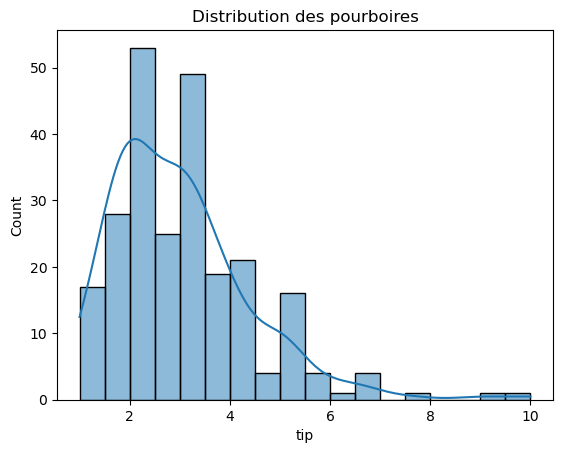

Statistique de test : 0.8978110496018736
p-value : 8.200360128656659e-12
❌ Les données ne suivent pas une loi normale.


In [3]:

sns.histplot(df['tip'], kde=True)
plt.title("Distribution des pourboires")
plt.show()

# Test de Shapiro-Wilk
stat, p = stats.shapiro(df['tip'])
print("Statistique de test :", stat)
print("p-value :", p)
if p > 0.05:
    print("✅ Les données semblent suivre une loi normale.")
else:
    print("❌ Les données ne suivent pas une loi normale.")

#Histogramme + Test de normalité (Shapiro-Wilk)
# Histogramme + KDE (courbe lisse)
#Te montre la forme de la distribution des données (normale, asymétrique, aplatie, etc.).

# Shapiro-Wilk Test
#Objectif : vérifier si les données suivent une distribution normale.
#Hypothèse nulle H₀ : Les données suivent une loi normale.
#p-value > 0.05 → ✅ tu ne rejette pas H₀ → les données sont normales
#p-value ≤ 0.05 → ❌ tu rejette H₀ → les données ne sont pas normales




## 🎯 3. Intervalle de confiance à 95%

In [4]:

from scipy.stats import norm

mean_tip = df['tip'].mean()
std_tip = df['tip'].std()
n = len(df['tip'])
margin = 1.96 * (std_tip / np.sqrt(n))

ci_lower = mean_tip - margin
ci_upper = mean_tip + margin

print(f"Intervalle de confiance à 95% : [{ci_lower:.2f}, {ci_upper:.2f}]")

#Interprétation :
#"Je suis 95% sûr que la moyenne vraie du pourboire dans la population est entre X et Y"
#C’est un encadrement de l’incertitude de ta moyenne.


Intervalle de confiance à 95% : [2.82, 3.17]


## 🧪 4. Test T – Différence de moyennes entre hommes et femmes

In [5]:

male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']

t_stat, p_val = stats.ttest_ind(male_tips, female_tips)
print("T-statistique :", t_stat)
print("p-value :", p_val)
if p_val < 0.05:
    print("❌ Rejet de l'hypothèse nulle : les moyennes sont différentes.")
else:
    print("✅ On ne rejette pas l'hypothèse nulle : pas de différence significative.")


#Test T de Student (comparaison entre hommes et femmes)
# Hypothèse :
#H₀ : les moyennes des pourboires entre hommes et femmes sont égales
#H₁ : les moyennes sont différentes

# Interprétation :
#Si p-value < 0.05 → ❌ tu rejette H₀ → il y a une vraie différence significative entre les groupes
#Si p-value ≥ 0.05 → ✅ tu ne rejette pas H₀ → les moyennes ne sont pas significativement différentes


T-statistique : 1.387859705421269
p-value : 0.16645623503456755
✅ On ne rejette pas l'hypothèse nulle : pas de différence significative.


## 📉 5. Corrélation et régression linéaire

Coefficient de corrélation : 0.6757341092113641


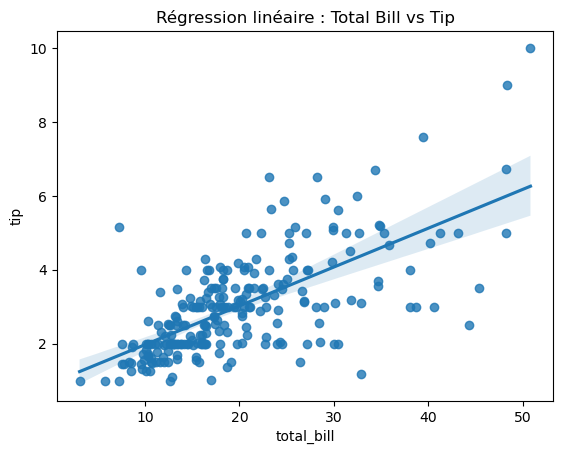

In [6]:

corr = df['total_bill'].corr(df['tip'])
print("Coefficient de corrélation :", corr)

# Régression visuelle
sns.regplot(data=df, x='total_bill', y='tip')
plt.title("Régression linéaire : Total Bill vs Tip")
plt.show()

#Corrélation (Pearson) :
#Coefficient entre -1 et 1
#Proche de 1 → relation forte et positive (plus A augmente, plus B aussi)
#Proche de -1 → relation forte mais inverse
#Proche de 0 → pas de relation linéaire

# Régression linéaire :
#Trace une droite de tendance pour prédire une variable (tip) à partir d’une autre (total_bill)
#Te montre visuellement la relation
#Si la droite est bien alignée avec les points → relation forte

